### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 8
### Due: Friday, Apr 11th at 11.59pm CT
---

## Only one problem this week

1. Use the following code snippet to read in SDSS galaxy color data.

<!--```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```-->

`data = np.load('../hw_data/hw8_data_1.npy')`

This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.


4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*


5. Repeat (4) for Quadratic Discriminant Analysis. 


6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.


7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 


8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 


9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 


10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

In [110]:
#imports
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as quadDis
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
#1
data = np.load('hw8_data_1.npy')
#print(data)
print("Column Names:", data.dtype.names)

u = data['u']
g = data['g']
r = data['r']
i = data['i']
z = data['z']
specClass = data['specClass']
redshift = data['redshift']
redshift_err = data['redshift_err']

A = u - g
B = g - r
C = r - i
D = i - z

N_Galaxy = []
N_Quasar = []
for ii in range(len(data)):
    if specClass[ii] == 'GALAXY':
        N_Galaxy.append(ii)
    elif specClass[ii] == 'QSO':
        N_Quasar.append(ii)

print("Number of Galaxies:", len(N_Galaxy))
print("Number of Quasars:", len(N_Quasar))

Column Names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
Number of Galaxies: 42808
Number of Quasars: 7192


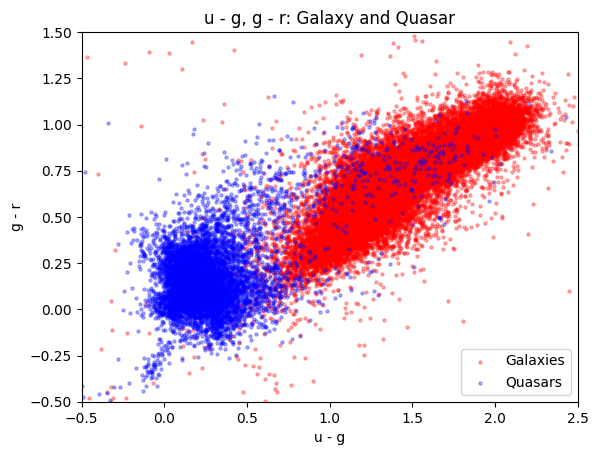

In [55]:
#2
plt.scatter(A[N_Galaxy], B[N_Galaxy], c = 'red', alpha = 0.3, s = 5, label = 'Galaxies')
plt.scatter(A[N_Quasar], B[N_Quasar], c = 'blue', alpha = 0.3, s = 5, label= 'Quasars')
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.title("u - g, g - r: Galaxy and Quasar")
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.5)
plt.legend()

In [74]:
#3
X = np.vstack([A, B, C, D, redshift]).T

Y = []
for ii in range(len(data)):
    if specClass[ii] == 'QSO':
        Y.append(1)
    else:
        Y.append(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

The very last one #5 (redshift) with all components (with Z) makes this very simple.


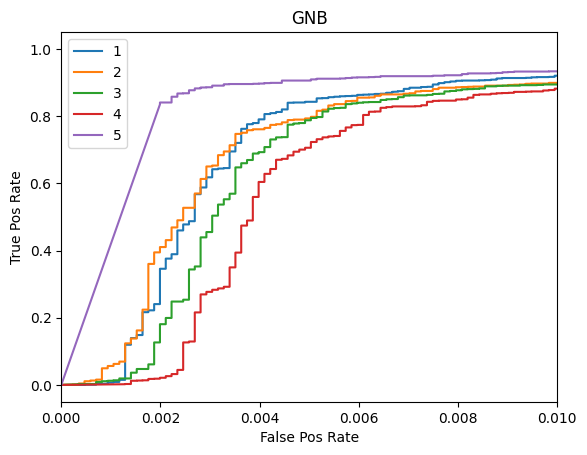

In [ ]:
#4
X1 = []
Y1 = []
features = ['A', 'B', 'C', 'D', 'Z']

for ii in range(1, 6):
    Gauss = GaussianNB()
    Gauss.fit(X_train[:, : ii], Y_train)
    Ypredict1 = Gauss.predict_proba(X_test[:, : ii])[:, Gauss.classes_ == 1]
    fpr, tpr, thresh = roc_curve(Y_test, Ypredict1)
    plt.plot(fpr, tpr, label = ii)
    #print(ii)
    if ii == 5:         #for problem 9
        X1.append(fpr)
        Y1.append(tpr)

plt.xlim(0, 0.01)
plt.title("GNB")
plt.xlabel("False Pos Rate")
plt.ylabel("True Pos Rate")
plt.legend()

print("The very last one #5 (redshift) with all components (with Z) makes this very simple.")

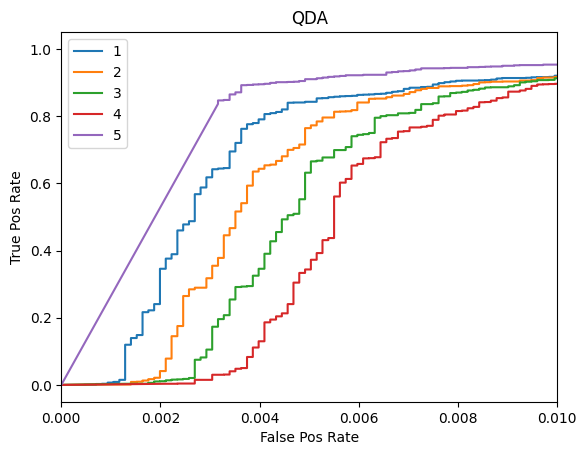

In [136]:
#5
X2 = []
Y2 = []

for ii in range(1, 6):
    Quad = quadDis()
    Quad.fit(X_train[:, : ii], Y_train)
    Ypredict2 = Quad.predict_proba(X_test[:, : ii])[:, Quad.classes_ == 1]
    fpr, tpr, thresh = roc_curve(Y_test, Ypredict2)
    plt.plot(fpr, tpr, label = ii)
    if ii == 5:         #for problem 9
        X2.append(fpr)
        Y2.append(tpr)

plt.xlim(0, 0.01)
plt.title("QDA")
plt.xlabel("False Pos Rate")
plt.ylabel("True Pos Rate")
plt.legend()


0.9800408993020576
0.9880469477337483
0.9894100165085186
0.9888982323217091
0.9883673859233209
0.9902921062738403
0.989686780517133
0.9898712094249363
0.9894849784544729
0.9897882043517339
The best number of components is: 6


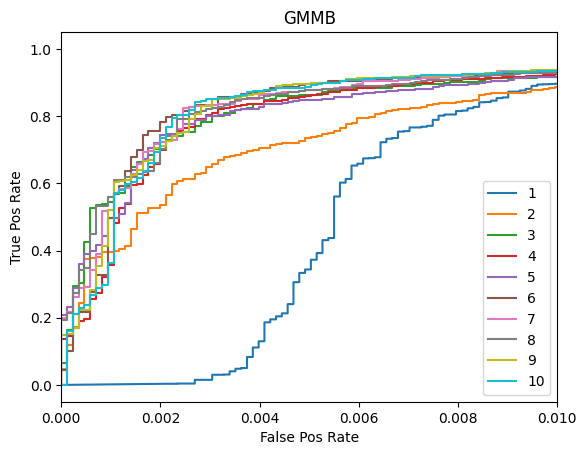

In [137]:
#6
X3 = []
Y3 = []
restrict = 4
AUC = []

for ii in range(1, 11):
    Bayes = GMMBayes(n_components = ii)
    Bayes.fit(X_train[:, : restrict], Y_train)
    Ypredict3 = Bayes.predict_proba(X_test[:, : restrict])[:, Bayes.classes_ == 1]
    fpr, tpr, thresh = roc_curve(Y_test, Ypredict3)
    plt.plot(fpr, tpr, label = ii)
    AUC.append(auc(fpr, tpr))
    print(AUC[ii - 1])
    if ii == 10:         #for problem 9
        X3.append(fpr)
        Y3.append(tpr)

plt.xlim(0, 0.01)
plt.title("GMMB")
plt.xlabel("False Pos Rate")
plt.ylabel("True Pos Rate")
plt.legend()

print("The best number of components is:", AUC.index(np.max(AUC)) + 1)

0.9808056800564628
0.988473635634271
0.9888997605158862
0.9900306644226341
0.9903231527450187
0.9904946724335889
0.99072128754381
0.9908738656677103
0.9910282132796052
0.9910143388851018
The best number of components is: 85


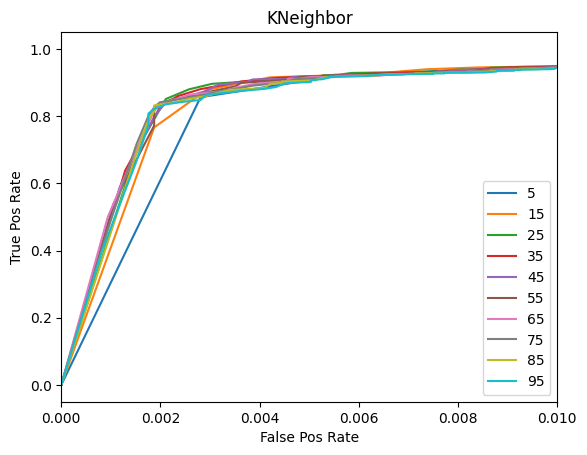

In [138]:
#7
X4 = []
Y4 = []
restrict = 4
KN = []

for ii in range(5, 100, 10):
    KNeighbor = KNeighborsClassifier(n_neighbors = ii)
    KNeighbor.fit(X_train[:, : restrict], Y_train)
    Ypredict4 = KNeighbor.predict_proba(X_test[:, : restrict])[:, KNeighbor.classes_ == 1]
    fpr, tpr, thresh = roc_curve(Y_test, Ypredict4)
    plt.plot(fpr, tpr, label = ii)
    KN.append(auc(fpr, tpr))
    #print(int((ii + 5) / 10))
    print(KN[int((ii + 5) / 10) - 1])
    if ii == 85:         #for problem 9
        X4.append(fpr)
        Y4.append(tpr)

plt.xlim(0, 0.01)
plt.title("KNeighbor")
plt.xlabel("False Pos Rate")
plt.ylabel("True Pos Rate")
plt.legend()

print("The best number of components is:", (KN.index(np.max(KN)) + 1) * 10 - 5)

0.9637836077045117
0.971566982158333
0.9728717784761893
0.9762692356415099
0.9760503419334472
0.9753636599446233
0.9758339013791952
0.9661770412954261
0.9680520149039149
0.9678577733808682
The best number of components is: 4


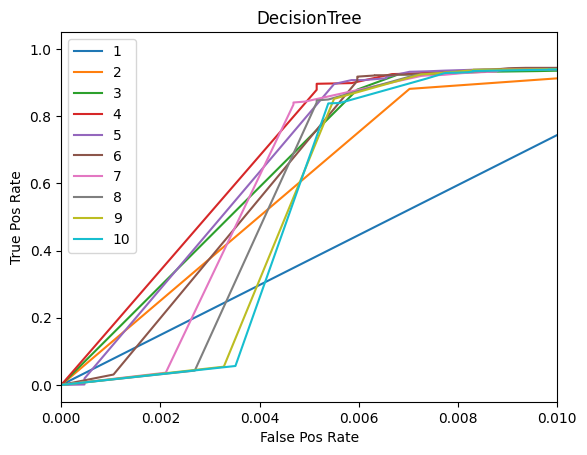

In [157]:
#8
X5 = []
Y5 = []
restrict = 4
TClass = []

for ii in range(1, 11, 1):
    Tree = DecisionTreeClassifier(max_depth = ii)
    Tree.fit(X_train[:, : restrict], Y_train)
    Ypredict5 = Tree.predict_proba(X_test[:, : restrict])[:, Tree.classes_ == 1]
    fpr, tpr, thresh = roc_curve(Y_test, Ypredict5)
    plt.plot(fpr, tpr, label = ii)
    TClass.append(auc(fpr, tpr))
    print(TClass[ii - 1])
    if ii == 7:         #for problem 9
        X5.append(fpr)
        Y5.append(tpr)

plt.xlim(0, 0.01)
plt.title("DecisionTree")
plt.xlabel("False Pos Rate")
plt.ylabel("True Pos Rate")
plt.legend()

print("The best number of components is:", TClass.index(np.max(TClass)) + 1)

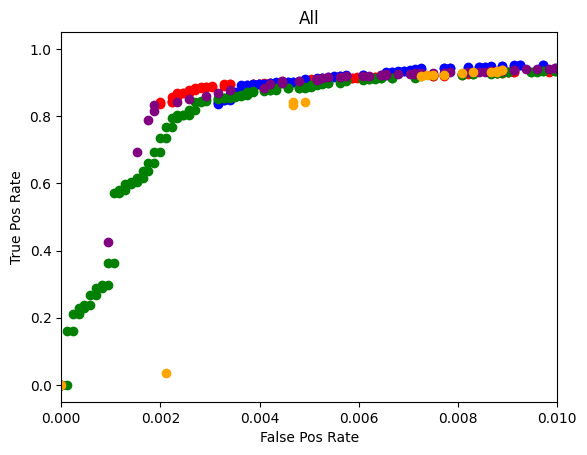

In [176]:
#9
plt.plot(X1, Y1, linestyle = '-', marker = 'o', label = 'GNB', c = 'red')
plt.plot(X2, Y2, linestyle = '-', marker = 'o', label = 'QDA', c = 'blue')
plt.plot(X3, Y3, linestyle = '-', marker = 'o', label = 'GMMB', c = 'green')
plt.plot(X4, Y4, linestyle = '-', marker = 'o', label = 'Neighbor', c = 'purple')
plt.plot(X5, Y5, linestyle = '-', marker = 'o', label = 'Tree', c = 'orange')

plt.xlim(0, 0.01)
plt.title("All")
plt.xlabel("False Pos Rate")
plt.ylabel("True Pos Rate")
#plt.legend()
plt.show()

<span style="color:red">NP: which is best algorithm? -1 pt</span>

IndexError: index 10000 is out of bounds for axis 0 with size 10000

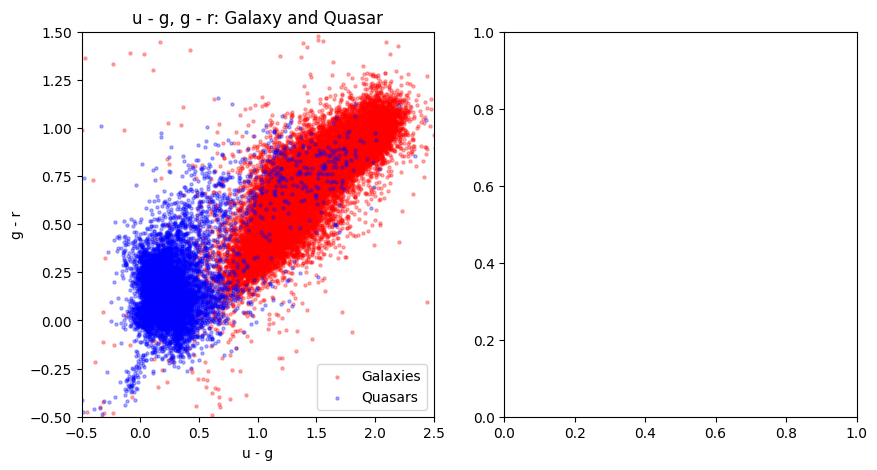

In [180]:
#10
Tree = DecisionTreeClassifier(max_depth = 4)
Tree.fit(X_train[:, : restrict], Y_train)
Ypredict5 = Tree.predict_proba(X_test[:, : restrict])[:, Tree.classes_ == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.scatter(A[N_Galaxy], B[N_Galaxy], c = 'red', alpha = 0.3, s = 5, label = 'Galaxies')
ax1.scatter(A[N_Quasar], B[N_Quasar], c = 'blue', alpha = 0.3, s = 5, label= 'Quasars')
ax1.set_xlabel("u - g")
ax1.set_ylabel("g - r")
ax1.set_title("u - g, g - r: Galaxy and Quasar")
ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 1.5)
ax1.legend()

ax2.scatter(X_test[N_Galaxy], Ypredict5[N_Galaxy], c = 'red', alpha = 0.3, s = 5, label = 'Galaxies')
ax2.scatter(X_test[N_Quasar], Ypredict5[N_Quasar], c = 'blue', alpha = 0.3, s = 5, label= 'Quasars')
ax2.set_xlabel("u - g")
ax2.set_ylabel("g - r")
ax2.set_title("u - g, g - r: Galaxy and Quasar")
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-0.5, 1.5)
ax2.legend()

<span style="color:red">NP: missing right-hand panel. -1 pt</span>